## Predicting Sentiment Score on a scale of 0-5 using Logistic Regression

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
import matplotlib.pyplot as plt
import numpy as np
from sklearn import metrics
import seaborn as sns

In [38]:
#importing libraries for prediction
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score

In [39]:
df_LR=pd.read_csv('dataframe_Reviews.csv',engine='python')
df_LR.head(2)


,User ID,Item ID,Item Name,RecommendItem,Reviews,Total Item Playtime,SentimentScore,Emoji
0,crazyclerkm,730.0,Counter-Strike: Global Offensive,True,k,142917967.0,0.0,🤢
1,76561197995338574,730.0,Counter-Strike: Global Offensive,True,"yer (buy game, much fun)",142917967.0,3.0,😐


In [40]:
# detecting if any null values are present
df_LR=df_LR[pd.notnull(df_LR['Reviews'])]
df_LR=df_LR[pd.notnull(df_LR['SentimentScore'])]

In [41]:
x_train, x_test, y_train, y_test = train_test_split(df_LR.Reviews.values.astype('U'), df_LR.SentimentScore, random_state=0)


In [42]:
# Vectorize X_train
vectorizer = CountVectorizer(min_df=5).fit(x_train)
X_train = vectorizer.transform(x_train)
print("X_train:\n{}".format(repr(X_train)))

X_train:
<32649x10110 sparse matrix of type '<class 'numpy.int64'>'
	with 847563 stored elements in Compressed Sparse Row format>


In [43]:
#Performing 5 fold cross-validation 
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=5)

/Users/ranjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/ranjana/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/Users/ranjana/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [44]:
print("Mean cross-validation accuracy: {:.3f}".format(np.mean(scores)))

Mean cross-validation accuracy: 0.887


##  Predicting the sentiment  using Logistic Regression

In [45]:
logreg = LogisticRegression(C=0.1).fit(X_train, y_train)

X_test = vectorizer.transform(x_test)

log_y_pred = logreg.predict(X_test)

In [46]:
# Estimating the accuracy of the test prediction
logreg_score = accuracy_score(y_test, log_y_pred)
print("Accuracy:   {:.3f}".format(logreg_score))

Accuracy:   0.861


## Evaluating the prediction results

The performance of the classification model can be analysed using confusion matrix. This matrix summarises the count values of both correct and incorrect prediction and thus provide a easy way to visualize the results

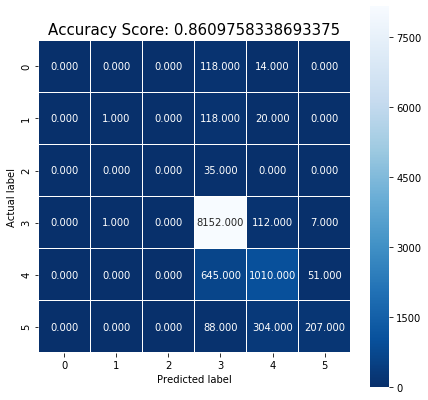

In [47]:
plt.figure(figsize=(7,7))


cm = metrics.confusion_matrix(y_test, log_y_pred)


sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(logreg_score)
plt.title(all_sample_title, size = 15);